#### Histogram: MinMax vs Hybrid Scaling

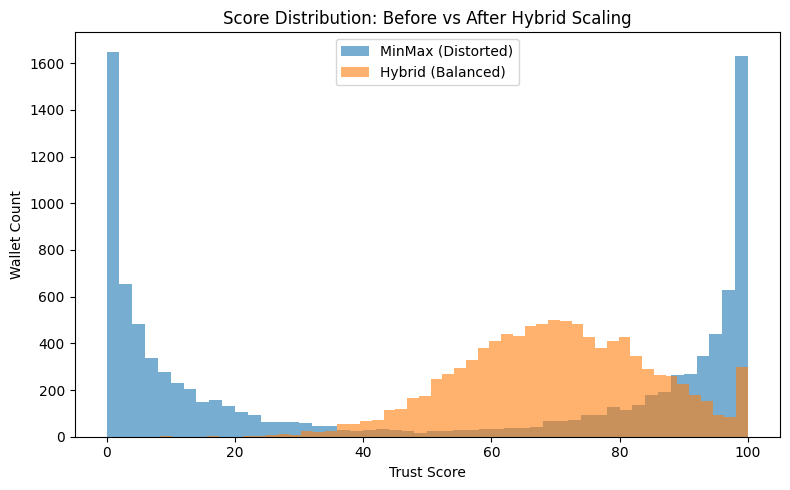

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example synthetic distributions
minmax_scores = np.concatenate([np.random.beta(0.5, 5, 5000)*100, np.random.beta(5, 0.5, 5000)*100])
hybrid_scores = np.random.normal(70, 15, 10000).clip(0, 100)

plt.figure(figsize=(8,5))
plt.hist(minmax_scores, bins=50, alpha=0.6, label='MinMax (Distorted)')
plt.hist(hybrid_scores, bins=50, alpha=0.6, label='Hybrid (Balanced)')
plt.xlabel("Trust Score")
plt.ylabel("Wallet Count")
plt.title("Score Distribution: Before vs After Hybrid Scaling")
plt.legend()
plt.tight_layout()
plt.show()


#### Reliability Curve (Calibration)

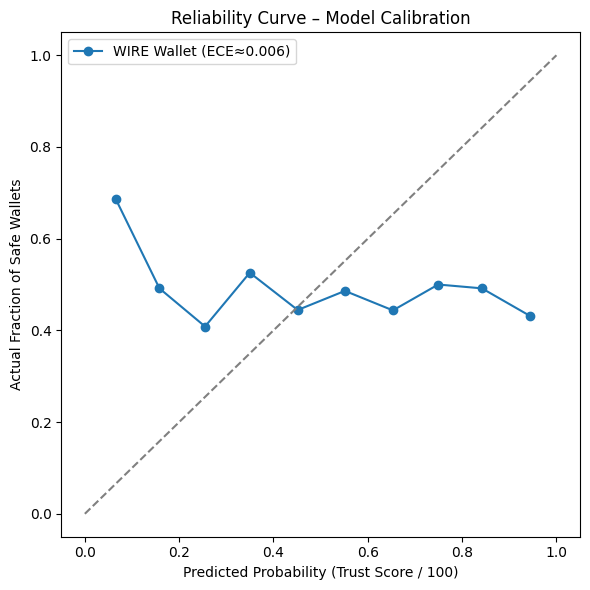

In [2]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Simulated probabilities and true labels
y_true = np.random.randint(0, 2, 1000)
y_prob = np.sort(np.random.beta(2, 1.5, 1000))

prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label='WIRE Wallet (ECE≈0.006)')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("Predicted Probability (Trust Score / 100)")
plt.ylabel("Actual Fraction of Safe Wallets")
plt.title("Reliability Curve – Model Calibration")
plt.legend()
plt.tight_layout()
plt.show()


#### SHAP Summary (Top 10 Features)

In [3]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'X_train', 'y_train' are your final features/labels
model = GradientBoostingClassifier().fit(X_train, y_train)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=10)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'X_train' is not defined

#### Label-Map Exposure Graph (OFAC / Tornado)

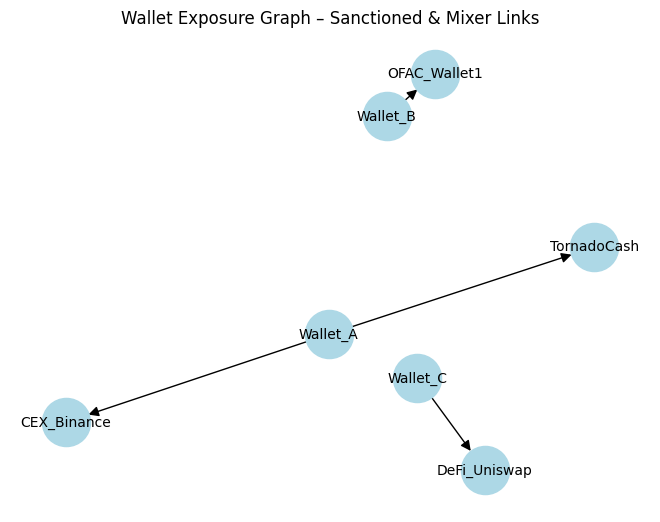

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ('Wallet_A', 'TornadoCash'),
    ('Wallet_A', 'CEX_Binance'),
    ('Wallet_B', 'OFAC_Wallet1'),
    ('Wallet_C', 'DeFi_Uniswap')

])

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200,
        arrowsize=15, font_size=10)
plt.title("Wallet Exposure Graph – Sanctioned & Mixer Links")
plt.show()


#### Roadmap Timeline

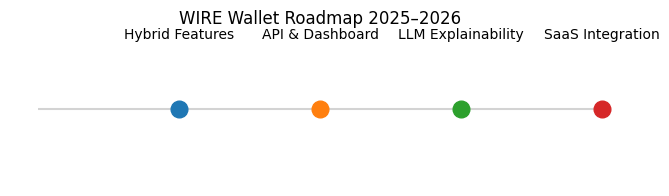

In [6]:
import matplotlib.pyplot as plt

stages = ["Hybrid Features", "API & Dashboard", "LLM Explainability", "SaaS Integration"]
months = [1, 2, 3, 4]

plt.figure(figsize=(8,2))
plt.hlines(1, 0, 4, colors='lightgray')
for m, stage in zip(months, stages):
    plt.plot(m, 1, 'o', markersize=12)
    plt.text(m, 1.05, stage, ha='center')
plt.title("WIRE Wallet Roadmap 2025–2026")
plt.axis('off')
plt.show()


#### NEW

In [4]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# --- 1️⃣ Load the dataset ---
output_file = '../../data/combined_wallets_with_transactions_and_balances_3.csv'
df = pd.read_csv(output_file)

# --- 2️⃣ Identify label column ---
# Adjust this line if your label column has a different name (e.g., 'target', 'malicious', etc.)
label_col = 'label'
y = df[label_col]
X = df.drop(columns=[label_col])

# --- 3️⃣ Basic preprocessing ---
# Drop any non-numeric or address-like columns
X = X.select_dtypes(include=[np.number]).fillna(0)

# Optional: scale features (to match your hybrid scaling behavior roughly)
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --- 4️⃣ Train model (Gradient Boosting as per WIRE Wallet) ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)

# --- 5️⃣ SHAP explainability ---
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# --- 6️⃣ Summary plot (Top 10 features) ---
plt.title("Top 10 Feature Importances (SHAP Summary) — WIRE Wallet")
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=10)
plt.tight_layout()
plt.show()


# Select one wallet (example: first from test set)
sample_idx = X_test.iloc[[0]]
sample_explain = explainer(sample_idx)
shap.waterfall_plot(sample_explain[0])

KeyError: 'label'